# Wald solution graphs - Carter tetrad

## Basic initialization of the lorentzian manifold

Initialization of the Kerr manifold $\mathcal M_{Kerr}$ atlas with Boyer-Lindquist chart (BL) and of the metric tensor $g$ :

In [1]:
%display latex

M = Manifold(4, 'M', latex_name=r'\mathcal{M}', structure='Lorentzian')
BL.<t,r,th,ph> = M.chart(r"t r th:(0,pi):\theta ph:(0,2*pi):\phi") #boyer-lindquist chart definition
var('m, a', domain='positive') #definition of Kerr metric parameters
var('B_0')

g = M.metric() #we put the label g on the metric tensor

rho2 = r^2 + (a*cos(th))^2
Delta = r^2 -2*m*r + a^2
assume(r>0)

g[0,0] = -(1-2*m*r/rho2)
g[0,3] = -2*a*m*r*sin(th)^2/rho2
g[1,1], g[2,2] = rho2/Delta, rho2
g[3,3] = (r^2+a^2+2*m*r*(a*sin(th))^2/rho2)*sin(th)^2

g.display()

g = (2*m*r/(a^2*cos(th)^2 + r^2) - 1) dt*dt - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 - 2*m*r + r^2) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*m*r*sin(th)^2/(a^2*cos(th)^2 + r^2) + a^2 + r^2)*sin(th)^2 dph*dph

## Wald field solution definition

Definition of the Wald field solution $A = \frac{B_{0}}{2}(\psi + 2a\eta)$, where $\eta$ and $\psi$ are the 1-forms naturally associated with musical isomorphism respectively to the two Killing vector fields $\frac{\partial}{\partial t}$ and $\frac{\partial}{\partial \phi}$ :

In [2]:
#A = M.vector_field(name = "A")
A = (B_0/2)*(BL.frame()[3].down(g)+(2*a)*BL.frame()[0].down(g)) #BL.frame() gives the coordinate base of the chart before the dot, in this case Boyer-Lindquist chart
#A.display()
#A.display(BL)
A.display()

(B_0*a*m*r - B_0*a*r^2 - (B_0*a^3 - B_0*a*m*r)*cos(th)^2)/(a^2*cos(th)^2 + r^2) dt + 1/2*(2*B_0*a^2*m*r*sin(th)^4 - (4*B_0*a^2*m*r - B_0*a^2*r^2 - B_0*r^4 - (B_0*a^4 + B_0*a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph

Calculation of the Faraday tensor $F=dA$ (exterior derivative of $A$) :

In [3]:
F = A.exterior_derivative()

Computing the fully contravariant version of $F$ using musical isomorphism twice:

In [4]:
F_uu = F.up(g,0).up(g,1)

In [5]:
FF_scalar = F.contract(0,1,F_uu,0,1)

Calculation of $\star F$ :

In [6]:
F_star = F.hodge_dual()

Calculation of the fully contravariant version of $\star F$ using musical isomorphism twice:

In [7]:
F_star_uu = F_star.up(g,0).up(g,1)

In [8]:
FstarF_scalar = F.contract(0,1,F_star_uu,0,1)

Definition of ZAMO tetrad:

In [9]:
#definition of the coframe tetrad fields (as listed in the article)
#ZAMO ON tetrad

assume(a^2-2*m*r+r^2 >= 0)
assume(sin(th) > 0)

e2nu = g[0,3]^2/g[3,3]-g[0,0]
omega = -g[0,3]/g[3,3]

e0 = sqrt(1/e2nu)*M.vector_field(1,0,0,omega, frame=BL.frame(), name='e_{(0)}')
e1 = (1/sqrt(g[1,1]))*BL.frame()[1]
e2 = (1/sqrt(g[2,2]))*BL.frame()[2]
e3 = (1/sqrt(g[3,3]))*M.vector_field(0,0,0,1, frame=BL.frame(), name='e_{(3)}')


e = M.vector_frame('e', (e0, e1, e2, e3)) #costruction of the tetrad collection object e_{a}
de = e.coframe() #construction of the tetrad coframe object e^{a}         

Definition of electric and magnetic field and magnitudes squared:

In [10]:
E_mu = F_uu.contract(1,e0.down(g))
B_mu = -F_star_uu.contract(1,e0.down(g))
E_tetrad = E_mu.comp(e)
B_tetrad = B_mu.comp(e)
E2 = E_tetrad[1]^2+E_tetrad[2]^2
B2 = B_tetrad[1]^2+B_tetrad[2]^2

Check $B^2-E^2 = \frac{1}{2}F_{\mu\nu}F^{\mu\nu}$

In [11]:
B2-E2 == (1/2)*FF_scalar

True

## Plots of tetrad components

Definition of 3D euclidean space and polar coordinates:

In [12]:
E.<x,y> = EuclideanSpace()
cartesian = E.cartesian_coordinates()
polar.<r1,th1> = E.polar_coordinates()

Definition of the numerical parameters $a$, $m$, $B_{0}$, and important surfaces of Kerr metric:

In [13]:
a_set = 1
m_set = 1
B_set = 1

outer_EH = disk((0,0), m_set + sqrt(m_set^2-a_set^2), (0, 2*pi), color='black')
outer_EH_line = polar_plot(m_set + sqrt(m_set^2-a_set^2),(t,0,2*pi), color = 'black')
outer_ergo = polar_plot(m_set+sqrt(m_set^2-(a_set^2)*cos(t+pi/2)^2),(t,0,2*pi), color = 'black')

US(x,y)=unit_step(x^2+y^2-(m_set + sqrt(m_set^2-a_set^2))^2)

Setting the tetrad components of electric and magnetic field immersed in 3D euclidean space:

In [14]:
E_r_pol = (E_tetrad[1]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)
E_th_pol = (E_tetrad[2]/r).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)

B_r_pol = (B_tetrad[1]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)
B_th_pol = (B_tetrad[2]/r).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)

E_field = E_r_pol*polar.frame()[1] + E_th_pol*polar.frame()[2]
B_field = B_r_pol*polar.frame()[1] + B_th_pol*polar.frame()[2]

E_x_cart = (-E_field[2].expr())(-y,-x)
E_y_cart = (-E_field[1].expr())(-y,-x)

B_x_cart = (-B_field[2].expr())(-y,-x)
B_y_cart = (-B_field[1].expr())(-y,-x)

Making of the plot:

In [15]:
B_flux_right = streamline_plot((B_x_cart*US,B_y_cart*US), (x,0,6), (y,-6,6), plot_points = 100, color = "blue")
B_flux_left = streamline_plot((sgn(x)*B_x_cart*US,sgn(x)*B_y_cart*US), (x,-6,0), (y,-6,6), plot_points = 100, color = "blue")
B_flux = B_flux_right + B_flux_left

E_flux = streamline_plot((E_x_cart*US,E_y_cart*US), (x,-6,6), (y,-6,6), plot_points = 100, color = "green")

Magnetic field lines + outer ergosurface and outer horizon:

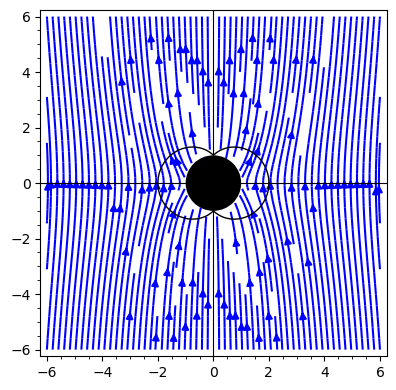

In [16]:
B_flux + outer_EH + outer_ergo

Electric field lines + outer ergosurface and outer horizon:

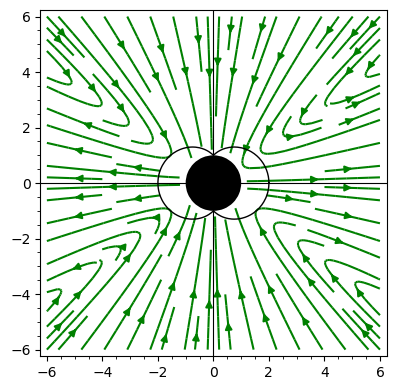

In [17]:
E_flux + outer_EH + outer_ergo

Production of the plots of the magnitude squared and the invariants $(\star F)_{\mu\nu}F^{\mu\nu}$ and $F_{\mu\nu}F^{\mu\nu}$:

In [18]:
E2_cart = E2.expr().factor().simplify_full()(m = m_set)(B_0 = B_set)(a = a_set)(r = sqrt(x^2+y^2))(th = atan(x/y))
B2_cart = B2.expr().factor().simplify_full()(m = m_set)(B_0 = B_set)(a = a_set)(r = sqrt(x^2+y^2))(th = atan(x/y))

FF_cart = FF_scalar.expr().factor().simplify_full()(m = m_set)(B_0 = B_set)(a = a_set)(r = sqrt(x^2+y^2))(th = atan(x/y))

FsF = FstarF_scalar.expr().factor().simplify_full()(m = m_set)(B_0 = B_set)(a = a_set)(r = sqrt(x^2+y^2))(th = atan(x/y))
FstarF_cart = FsF*unit_step(x) - FsF*unit_step(-x)

In [19]:
E2_plot = contour_plot(E2_cart*US, (x,-16,16), (y,-16,16), cmap = 'jet', contours = 20, colorbar = True, plot_points=700)
B2_plot = contour_plot(B2_cart*US, (x,-50,50), (y,-50,50), cmap = 'jet', contours = 20, colorbar = True, plot_points=700)

FF_plot = contour_plot(FF_cart*US, (x,-50,50), (y,-50,50), cmap = 'jet', contours = 20, colorbar = True, plot_points=700)
FstarF_plot = contour_plot(FstarF_cart*US, (x,-12,12), (y,-12,12), cmap = 'jet', contours = 20, colorbar = True, plot_points=700)

$B^{2}$ plot + outer ergosurface and outer horizon:

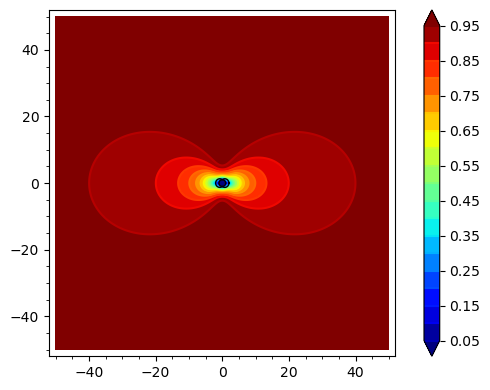

In [20]:
B2_plot + outer_ergo + outer_EH_line

$E^{2}$ plot + outer ergosurface and outer horizon:

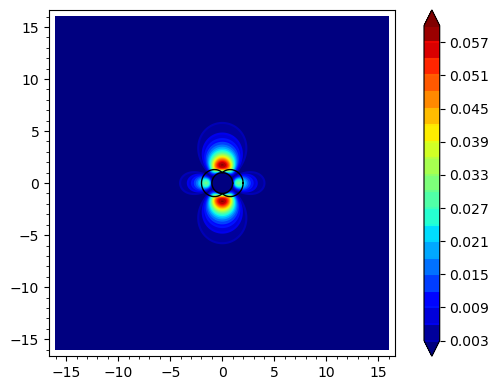

In [21]:
E2_plot + outer_ergo + outer_EH_line

## Plots of BL components

Setting the BL components of electric and magnetic field immersed in 3D euclidean space + plots computation:

In [22]:
E_r_pol = (E_mu[1]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)
E_th_pol = (E_mu[2]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)

B_r_pol = (B_mu[1]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)
B_th_pol = (B_mu[2]).expr()(a = a_set, m = m_set, B_0 = B_set)(r = r1, th = th1)

E_field = E_r_pol*polar.frame()[1] + E_th_pol*polar.frame()[2]
B_field = B_r_pol*polar.frame()[1] + B_th_pol*polar.frame()[2]

E_x_cart = (-E_field[2].expr())(-y,-x)
E_y_cart = (-E_field[1].expr())(-y,-x)

B_x_cart = (-B_field[2].expr())(-y,-x)
B_y_cart = (-B_field[1].expr())(-y,-x)

B_flux_right = streamline_plot((B_x_cart*US,B_y_cart*US), (x,0,4), (y,-4,4), plot_points = 100, color = "blue")
B_flux_left = streamline_plot((sgn(x)*B_x_cart*US,sgn(x)*B_y_cart*US), (x,-4,0), (y,-4,4), plot_points = 100, color = "blue")
B_flux = B_flux_right + B_flux_left

E_flux = streamline_plot((E_x_cart*US,E_y_cart*US), (x,-4,4), (y,-4,4), plot_points = 100, color = "green")

Magnetic field lines + outer ergosurface and outer horizon:

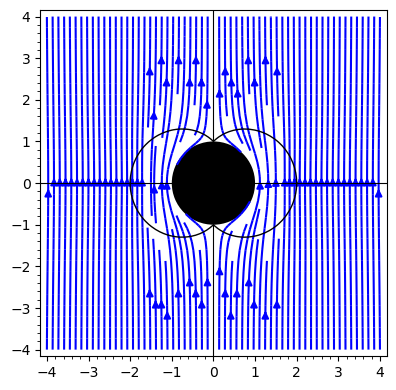

In [23]:
B_flux + outer_EH + outer_ergo

Electric field lines + outer ergosurface and outer horizon:

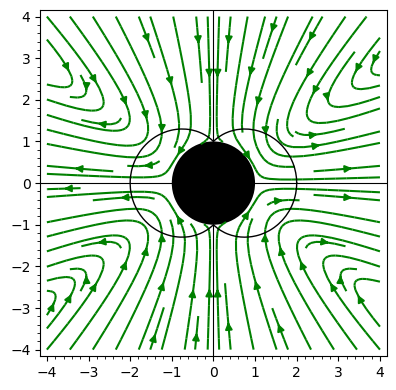

In [24]:
E_flux + outer_EH + outer_ergo

$(\star F)_{\mu\nu}F^{\mu\nu}$ + outer ergosurface and outer horizon:

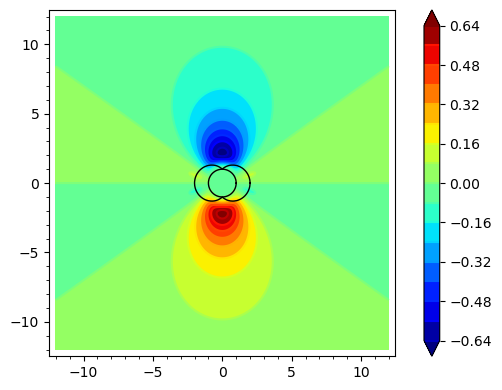

In [25]:
FstarF_plot + outer_ergo + outer_EH_line

$F_{\mu\nu}F^{\mu\nu}$ + outer ergosurface and outer horizon:

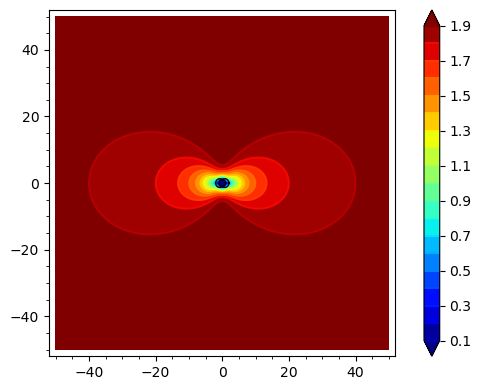

In [26]:
FF_plot + outer_ergo + outer_EH_line